In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

### Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

In [4]:
import os 
os.getcwd()

'/Users/damini/Downloads'

In [222]:
data =  pd.read_csv('/Users/damini/Downloads/cubic_zirconia.csv')

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [223]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [224]:
data = data.drop('Unnamed: 0', axis=1)

In [75]:
data.shape

(26967, 10)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


### Check duplicates :

In [226]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum())) 

Number of duplicate rows = 34


In [227]:
data.drop_duplicates(inplace=True)

In [228]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data.shape)

Number of duplicate rows = 0
(26933, 10)


### Geting unique counts of all Objects :

In [229]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print(feature)
        print(data[feature].value_counts())
        print('\n')
        

cut
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64


color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64




In [233]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


### Checking the spread of the data using boxplot for the continuous variables.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


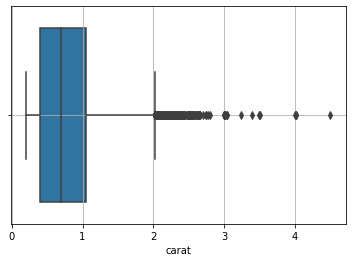

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


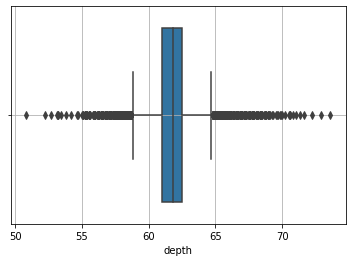

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


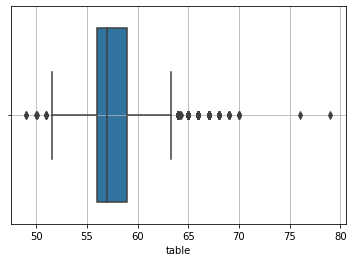

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


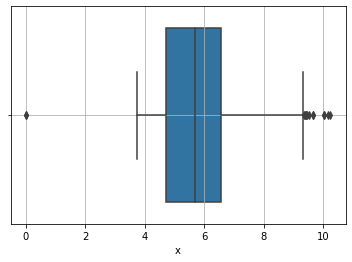

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


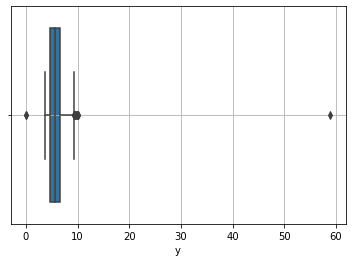

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


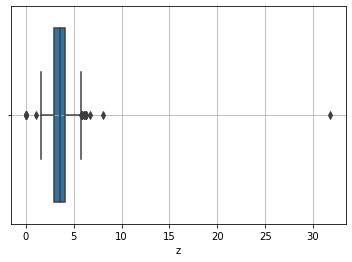

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


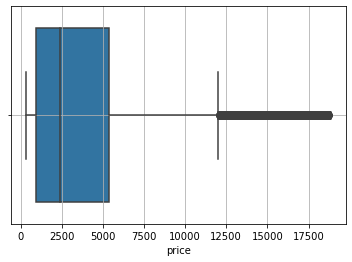

In [234]:
cols = ['carat','depth','table','x','y','z','price']
for i in cols:
    sns.boxplot(data[i],whis=1.5)
    plt.grid()
    plt.show();

### Treating the outliers.

In [235]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [241]:
lr,ur=remove_outlier(data['price'])
print('Lower Range :',lr,'\nUpper Range :',ur)
data['price']=np.where(data['price']>ur,ur,data['price'])
data['price']=np.where(data['price']<lr,lr,data['price'])

Lower Range : -5671.5 
Upper Range : 11972.5


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


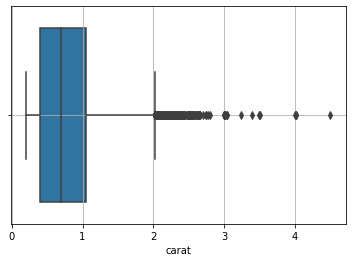

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


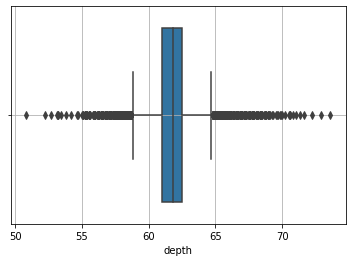

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


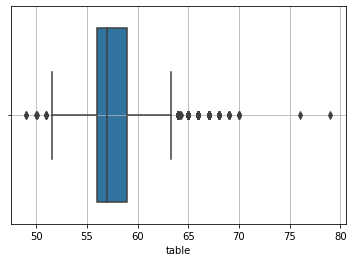

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


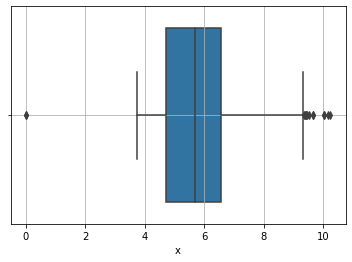

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


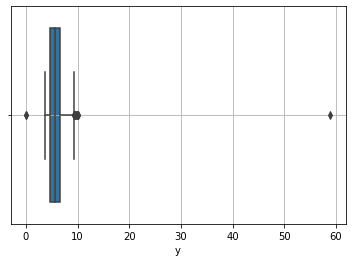

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


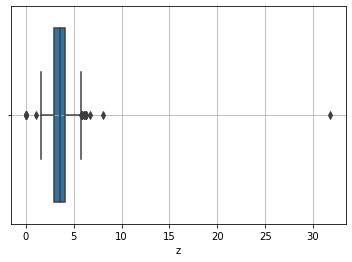

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


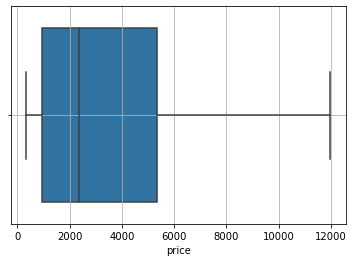

In [239]:
cols = ['carat','depth','table','x','y','z','price']
for i in cols:
    sns.boxplot(data[i],whis=1.5)
    plt.grid()
    plt.show();

### UNIVARIATE ANALYSIS :

In [218]:
data_numerical=['carat','depth','table','x','y','z','price']

Description of carat variable
Minimum Value:  0.2
Maximum Value:  4.5
Mean Value:  0.7980102476515696
Standard Deviation Value:  0.47723712670603413
skewness Value:  1.114789102547177
.................................................................................
Boxplot of carat


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


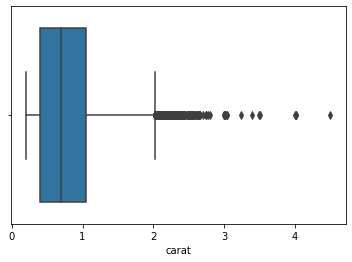

.................................................................................
Histogram of carat


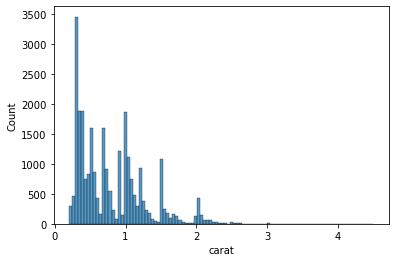

.................................................................................
Distplot of carat


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


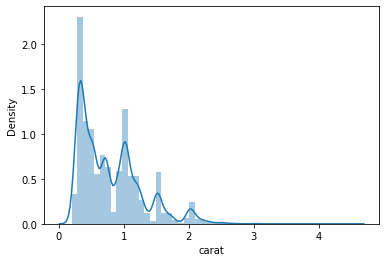

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of depth variable
Minimum Value:  50.8
Maximum Value:  73.6
Mean Value:  61.74528510443821
Standard Deviation Value:  1.3938483639991426
skewness Value:  -0.026430157117141025
.................................................................................
Boxplot of depth


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


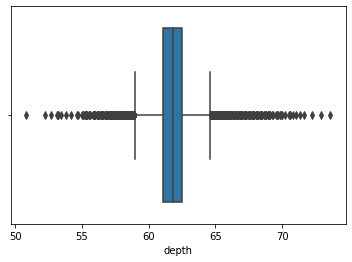

.................................................................................
Histogram of depth


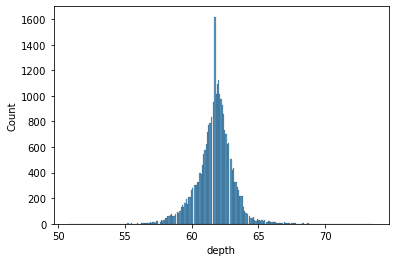

.................................................................................
Distplot of depth


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


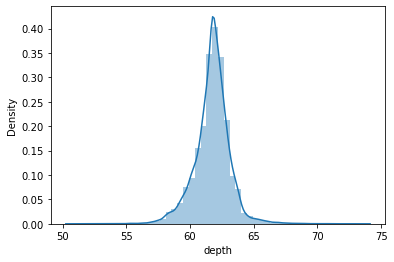

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of table variable
Minimum Value:  49.0
Maximum Value:  79.0
Mean Value:  57.45594994987559
Standard Deviation Value:  2.2321564939018232
skewness Value:  0.7658050724889769
.................................................................................
Boxplot of table


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


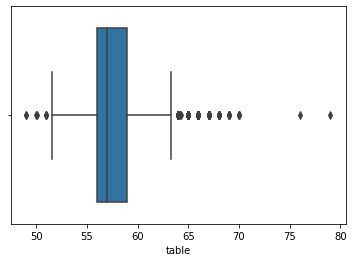

.................................................................................
Histogram of table


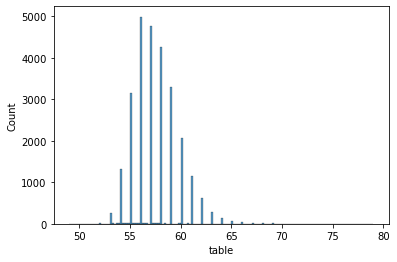

.................................................................................
Distplot of table


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


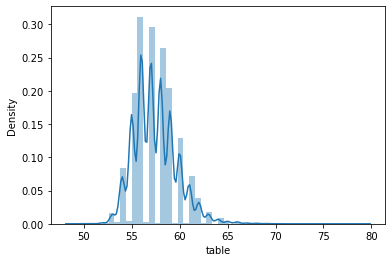

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of x variable
Minimum Value:  0.0
Maximum Value:  10.23
Mean Value:  5.729346155274198
Standard Deviation Value:  1.1273665240004738
skewness Value:  0.39228983097563763
.................................................................................
Boxplot of x


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


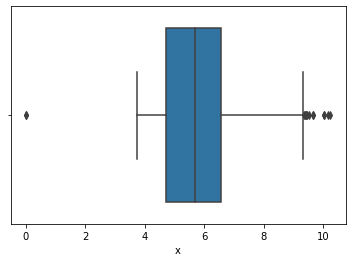

.................................................................................
Histogram of x


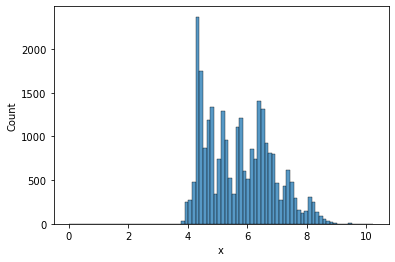

.................................................................................
Distplot of x


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


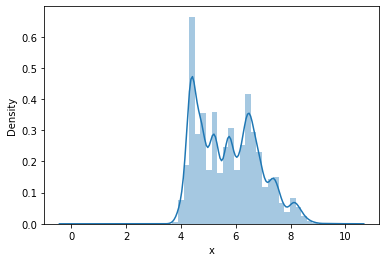

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of y variable
Minimum Value:  0.0
Maximum Value:  58.9
Mean Value:  5.733101771061486
Standard Deviation Value:  1.1650372029121105
skewness Value:  3.8677640870625782
.................................................................................
Boxplot of y


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


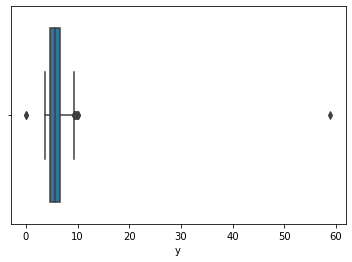

.................................................................................
Histogram of y


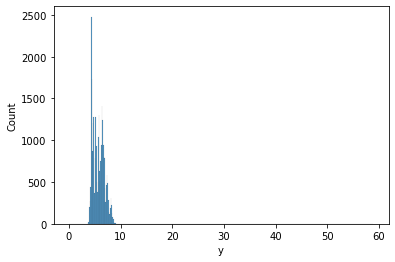

.................................................................................
Distplot of y


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


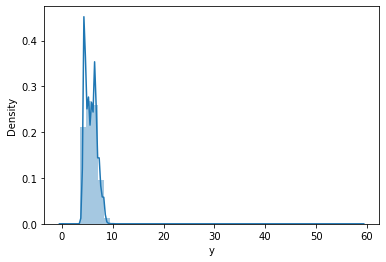

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of z variable
Minimum Value:  0.0
Maximum Value:  31.8
Mean Value:  3.537769279322763
Standard Deviation Value:  0.719963997376955
skewness Value:  2.5806646675426226
.................................................................................
Boxplot of z


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


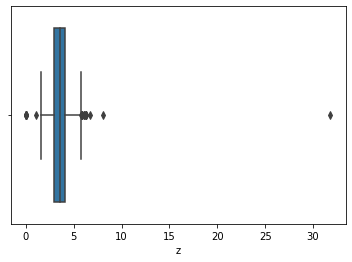

.................................................................................
Histogram of z


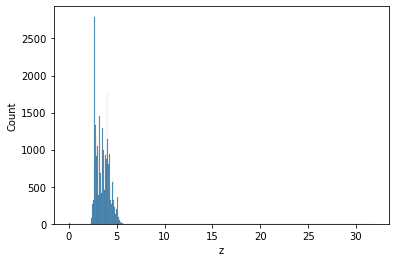

.................................................................................
Distplot of z


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


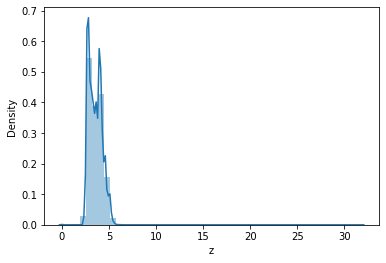

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of price variable
Minimum Value:  0
Maximum Value:  8741
Mean Value:  2664.839676233617
Standard Deviation Value:  2411.59198635434
skewness Value:  0.8515963975629827
.................................................................................
Boxplot of price


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


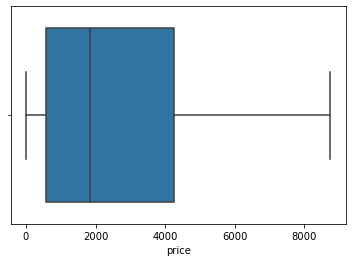

.................................................................................
Histogram of price


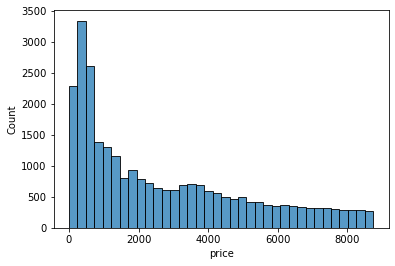

.................................................................................
Distplot of price


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


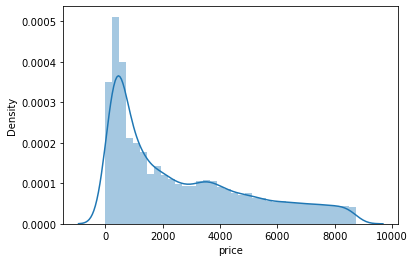

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [219]:
for i in data_numerical:
    print("Description of {} variable".format(i))
    print("Minimum Value: ",data[i].min())
    print("Maximum Value: ",data[i].max())
    print("Mean Value: ",data[i].mean())
    print("Standard Deviation Value: ",data[i].std())
    print("skewness Value: ",data[i].skew())
    print(".................................................................................")
    
    
    print("Boxplot of {}".format(i))
    sns.boxplot(data[i])
    plt.show()
    print(".................................................................................")
    
    
    print("Histogram of {}".format(i))
    sns.histplot(data[i])
    plt.show()
    print(".................................................................................")
    
    print("Distplot of {}".format(i))
    sns.distplot(data[i])
    plt.show()
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

In [231]:
data_categorical = ['cut','color','clarity']

Description of cut variable
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64


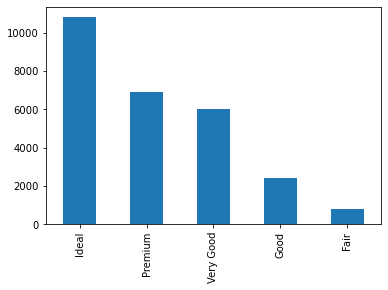

-----------------------------------------------------------------------------------------
Boxplot of cut


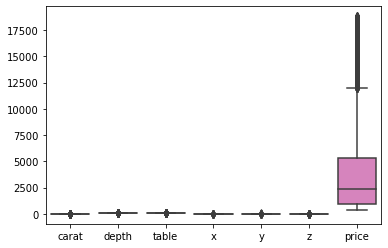

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of color variable
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64


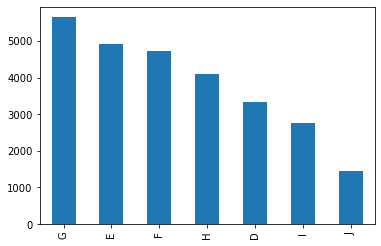

-----------------------------------------------------------------------------------------
Boxplot of color


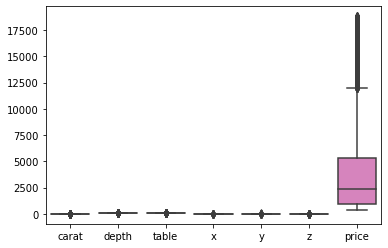

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of clarity variable
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64


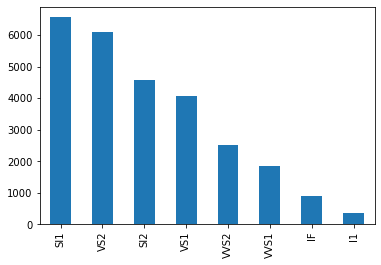

-----------------------------------------------------------------------------------------
Boxplot of clarity


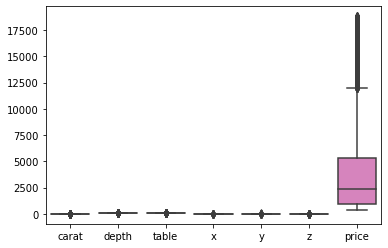

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [232]:
for i in data_categorical: 
    print("Description of {} variable".format(i))
    print(data[i].value_counts())
    data[i].value_counts().plot(kind = "bar")
    plt.show()
    print("-----------------------------------------------------------------------------------------")
    
    print("Boxplot of {}".format(i))
    sns.boxplot(data = data)
    plt.show()
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
    

### BIVARIATE AND MULTIVARIATE ANALYSIS :

### Checking for Correlations.

In [40]:
data.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035240,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.035240,1.000000,-0.297768,-0.018401,-0.024453,0.101973,-0.002895
table,0.181539,-0.297768,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018401,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024453,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.101973,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002895,0.126844,0.886554,0.856441,0.850682,1.000000


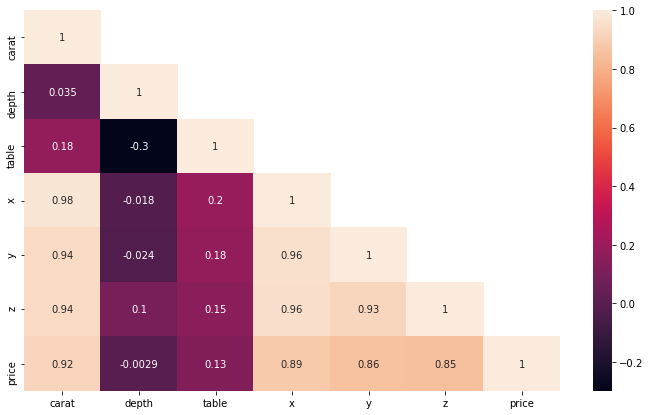

In [41]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True,mask=np.triu(data.corr(),+1));

In [42]:
data.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


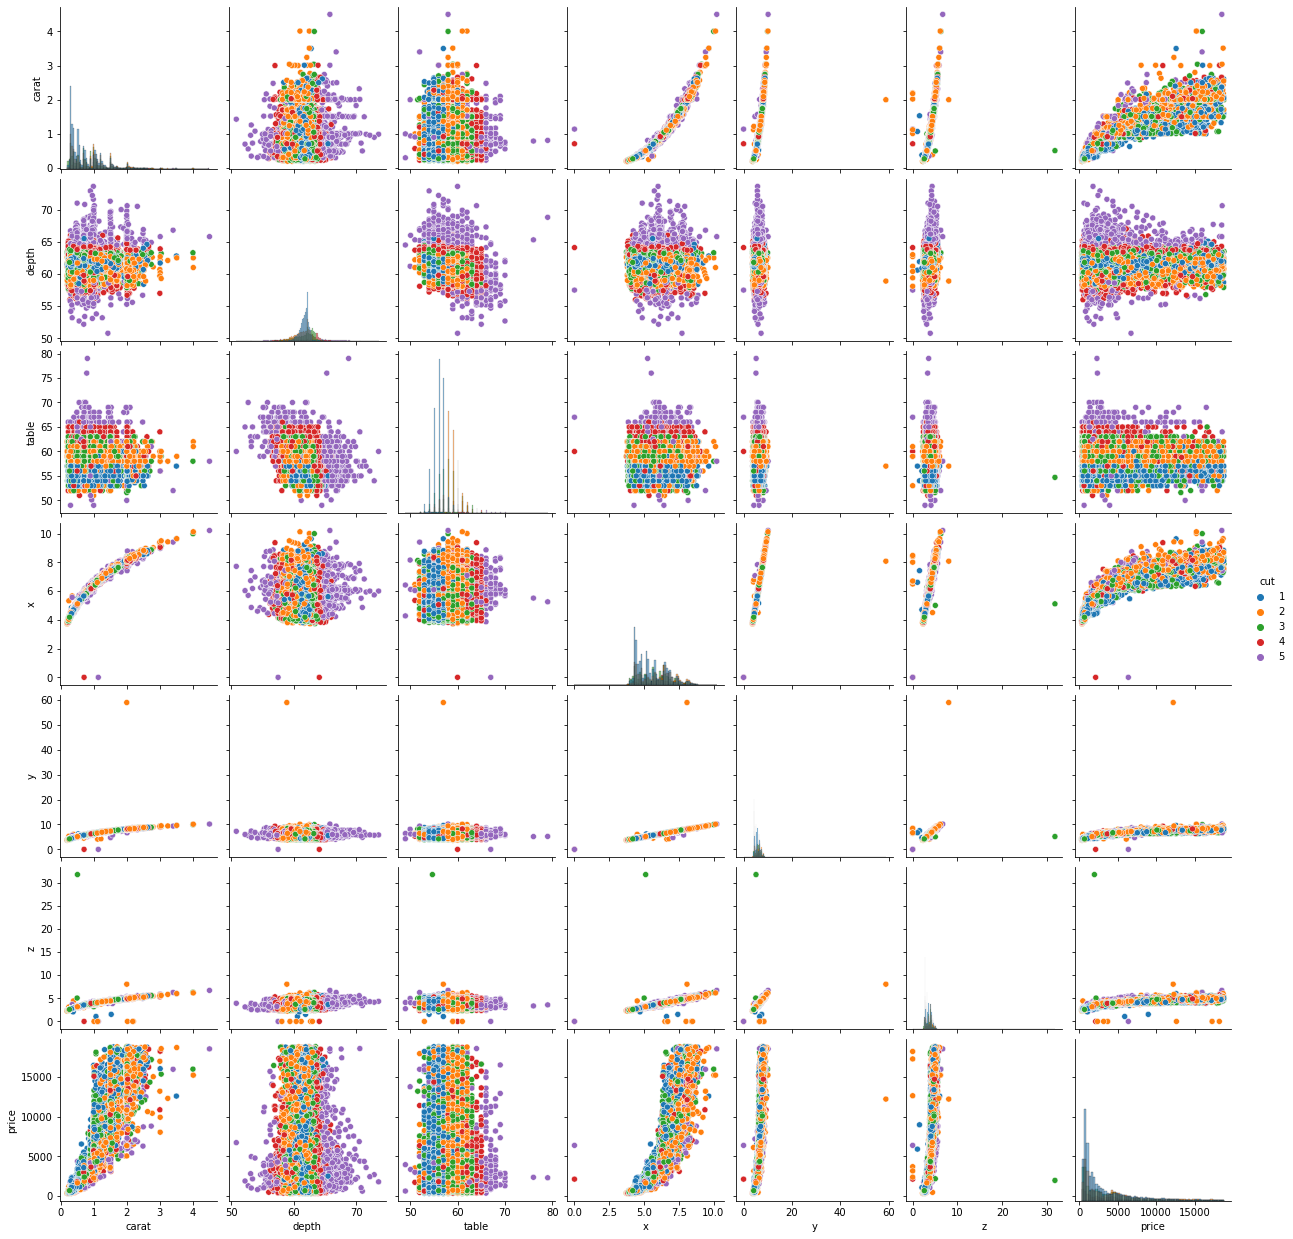

In [61]:
sns.pairplot(data ,diag_kind='hist' ,hue='cut');

### OBSERVATIONS:
* Total 10 columns are used to build the model.
* The number of rows in the dataframe is 26967 and the number of columns in the dataframe is 11 .
* All the columns are in float datatype except cut,color and clarity with data type as object.
* There are 697 missing values in variable depth and imputed.
* There are 34 duplicates and are treated.
* Outlier Treatment is not necessary except for price as being dependent variable.

#### UNIVARIATE ANALYSIS :
* Table variable shows the normal distribution.
* Depth, x and price variables shows the normal distribution slightly.
* Carat variable is right skewed.
* z and y variables  show right skewness.
* For cut variable Ideal shows the highest and fair shows the least count.
* For color variable G shows the highest and J shows the least count.
* For Clarity variable SI1 shows the highest and I1r shows the least count.

#### MULTIVARIATE ANALYSIS :
* Highest correlation can be seen between x,y and z with price.
* z,y and x also show high correlations with each other.
* Table with depth shows lowest correlation with value -0.33. 

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them?

In [87]:
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [90]:
for column in data.columns:
    if data[column].dtype != 'object':
        mean = data[column].mean()
        data[column] = data[column].fillna(mean)    
        
data.isnull().sum()        

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Converting all objects to categorical codes

In [243]:
## We are coding up the 'cut' variable in an ordinal manner

data['cut']=np.where(data['cut'] =='Ideal', '1',data['cut'])
data['cut']=np.where(data['cut'] =='Premium', '2',data['cut'])
data['cut']=np.where(data['cut'] =='Very Good','3',data['cut'])
data['cut']=np.where(data['cut'] =='Good', '4',data['cut'])
data['cut']=np.where(data['cut'] =='Fair', '5',data['cut'])

In [244]:
## We are grouping certain types of 'clarity' under different categories

data['clarity']=np.where(data['clarity'] =='SI1','SI', data['clarity'])
data['clarity']=np.where(data['clarity'] =='SI2','SI', data['clarity'])
data['clarity']=np.where(data['clarity'] =='VS1','VS', data['clarity'])
data['clarity']=np.where(data['clarity'] =='VS2','VS', data['clarity'])
data['clarity']=np.where(data['clarity'] =='VVS1','VVS', data['clarity'])
data['clarity']=np.where(data['clarity'] =='VVS2','VVS', data['clarity'])

In [245]:
## We are grouping certain types of 'color' under different categories

data['color']=np.where(data['color'] =='D','Worst', data['color'])
data['color']=np.where(data['color'] =='E','Worse', data['color'])
data['color']=np.where(data['color'] =='F','Bad', data['color'])
data['color']=np.where(data['color'] =='G','Good', data['color'])
data['color']=np.where(data['color'] =='H','Good', data['color'])
data['color']=np.where(data['color'] =='I','Best', data['color'])
data['color']=np.where(data['color'] =='J','Best', data['color'])

In [246]:
data.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,1,Worse,SI,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,2,Good,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,3,Worse,VVS,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,1,Bad,VS,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,1,Bad,VVS,60.4,59.0,4.35,4.43,2.65,779.0


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  int64  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 2.3+ MB


### Inference :

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [101]:
## Converting the 'clarity' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [132]:
## Applying the created Label Encoder object for the target class

data['price'] = LE.fit_transform(data['price'])
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,1,Worse,2,62.1,58.0,4.27,4.29,2.66,137
1,0.33,2,Good,1,60.8,58.0,4.42,4.46,2.70,615
2,0.90,3,Worse,7,62.2,60.0,6.04,6.12,3.78,4874
3,0.42,1,Bad,4,61.6,56.0,4.82,4.80,2.96,712
4,0.31,1,Bad,6,60.4,59.0,4.35,4.43,2.65,411


In [144]:
## Converting the other 'object' type variables as dummy variables

data = pd.get_dummies(data,drop_first=True)
data.head()

,carat,clarity,depth,table,x,y,z,price,cut_2,cut_3,cut_4,cut_5,color_Best,color_Good,color_Worse,color_Worst
0,0.30,2,62.1,58.0,4.27,4.29,2.66,137,0,0,0,0,0,0,1,0
1,0.33,1,60.8,58.0,4.42,4.46,2.70,615,1,0,0,0,0,1,0,0
2,0.90,7,62.2,60.0,6.04,6.12,3.78,4874,0,1,0,0,0,0,1,0
3,0.42,4,61.6,56.0,4.82,4.80,2.96,712,0,0,0,0,0,0,0,0
4,0.31,6,60.4,59.0,4.35,4.43,2.65,411,0,0,0,0,0,0,0,0


In [145]:
data.dtypes

carat          float64
clarity          int64
depth          float64
table          float64
x              float64
y              float64
z              float64
price            int64
cut_2            uint8
cut_3            uint8
cut_4            uint8
cut_5            uint8
color_Best       uint8
color_Good       uint8
color_Worse      uint8
color_Worst      uint8
dtype: object

#### Separating dependent and independent variable :

In [146]:
# Copy all the predictor variables into X dataframe
X = data.drop('price', axis=1)

# Copy target into the y dataframe. 
y = data[['price']]

In [147]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [148]:
X.head()

,carat,clarity,depth,table,x,y,z,cut_2,cut_3,cut_4,cut_5,color_Best,color_Good,color_Worse,color_Worst
0,0.30,2,62.1,58.0,4.27,4.29,2.66,0,0,0,0,0,0,1,0
1,0.33,1,60.8,58.0,4.42,4.46,2.70,1,0,0,0,0,1,0,0
2,0.90,7,62.2,60.0,6.04,6.12,3.78,0,1,0,0,0,0,1,0
3,0.42,4,61.6,56.0,4.82,4.80,2.96,0,0,0,0,0,0,0,0
4,0.31,6,60.4,59.0,4.35,4.43,2.65,0,0,0,0,0,0,0,0


In [149]:
y_train.value_counts()

price
178      51
434      46
259      45
460      45
408      44
         ..
4652      1
4655      1
4656      1
4657      1
8740      1
Length: 7335, dtype: int64

In [150]:
y_test.value_counts()

price
178      23
239      23
259      22
408      22
460      21
         ..
3287      1
3291      1
3296      1
3297      1
8741      1
Length: 4424, dtype: int64

### Linear Regression Model

In [151]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [152]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 2950.0071330998285
The coefficient for clarity is 165.6945272524293
The coefficient for depth is 20.677838765372638
The coefficient for table is -8.402927416652107
The coefficient for x is 904.613878883796
The coefficient for y is 11.67009941749593
The coefficient for z is 33.33956908661351
The coefficient for cut_2 is -135.4704571489122
The coefficient for cut_3 is -74.04497425995464
The coefficient for cut_4 is -195.36425752975802
The coefficient for cut_5 is -732.922916331016
The coefficient for color_Best is -763.4319134641582
The coefficient for color_Good is -168.15654306969273
The coefficient for color_Worse is -16.19993164115429
The coefficient for color_Worst is 86.48424066874462


In [153]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -6223.16913548686


In [154]:
# R square on training data
regression_model.score(X_train, y_train)

0.9241347317398247

92.4% of the variation in the price is explained by the predictors in the model for train set.

In [155]:
# R square on testing data
regression_model.score(X_test, y_test)

0.925591081041152

In [157]:
from sklearn import metrics

In [158]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

663.545925442334

In [159]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

659.3955610547462

#### Linear Regression using statsmodels

In [160]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,clarity,depth,table,x,y,z,cut_2,cut_3,cut_4,cut_5,color_Best,color_Good,color_Worse,color_Worst,price
22114,0.34,5,62.4,60.0,4.41,4.44,2.76,0,1,0,0,0,1,0,0,172
2275,0.30,5,61.2,55.0,4.35,4.31,2.65,0,0,0,0,0,0,1,0,476
19183,0.50,2,62.5,57.0,5.09,5.05,3.17,0,0,0,0,0,1,0,0,865
5030,1.10,3,63.3,56.0,6.53,6.58,4.15,0,0,1,0,0,0,1,0,3234
25414,1.02,3,61.1,62.0,6.54,6.49,3.98,1,0,0,0,0,0,0,0,3227


In [161]:
data_train.columns

Index(['carat', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'cut_2', 'cut_3',
       'cut_4', 'cut_5', 'color_Best', 'color_Good', 'color_Worse',
       'color_Worst', 'price'],
      dtype='object')

In [162]:
expr= 'price ~ carat + clarity + depth + table + x + y + z + cut_2 + cut_3 + cut_4 + cut_5 + color_Best + color_Good + color_Worse + color_Worst'

In [163]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept     -6223.169135
carat          2950.007133
clarity         165.694527
depth            20.677839
table            -8.402927
x               904.613879
y                11.670099
z                33.339569
cut_2          -135.470457
cut_3           -74.044974
cut_4          -195.364258
cut_5          -732.922916
color_Best     -763.431913
color_Good     -168.156543
color_Worse     -16.199932
color_Worst      86.484241
dtype: float64

In [164]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 1.530e+04
Date:                Fri, 25 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:03:40   Log-Likelihood:            -1.4925e+05
No. Observations:               18853   AIC:                         2.985e+05
Df Residuals:                   18837   BIC:                         2.987e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6223.1691    385.066    -16.161      

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [165]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [166]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

663.5459254423332

In [167]:
np.sqrt(lm1.mse_resid) #another way

663.8276709782795

In [168]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

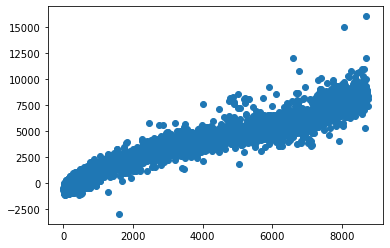

In [170]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [171]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-6223.17) * Intercept + (2950.01) * carat + (165.69) * clarity + (20.68) * depth + (-8.4) * table + (904.61) * x + (11.67) * y + (33.34) * z + (-135.47) * cut_2 + (-74.04) * cut_3 + (-195.36) * cut_4 + (-732.92) * cut_5 + (-763.43) * color_Best + (-168.16) * color_Good + (-16.2) * color_Worse + (86.48) * color_Worst + 

### COMPARISON BETWEEN THE TWO MODELS :

###### scikit learn :

The performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare;

•	Intercept = -6223.16

•	R square Training (92.4%) – 92.4% of the variation in the price is explained by the predictors in the model for train set.

•	R square Test (92.5 %) -92.5% of the variation in the price is explained by the predictors in the model for test set as well.

•	RMSE Training – 663.54

•	RMSE Test – 659.39 
The RMSE for training and test data shows some difference .

###### stats model :

•	Intercept = - 6223.16

•	R square Training (92.4%) – 92.4% of the variation in the price is explained by the predictors in the model for train set.

•	R Adj (92.4 %) -92.4% of the variation in the price is explained by the predictors in the model for test set as well.

•	RMSE Training – 663.54

•	RMSE Test – 663.82

The RMSE for training and test data shows almost same values and hence, statsmodel seems better than scikit learn. 



### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

### CONCLUSION :

 The final linear regression equation is :

#### price = b0+b1 * carat + b2 * clarity + b3 * depth + b4 * table + b5 * x + b6 * y + b7 * z + b8 * cut_2 + b9 * cut_3 + b10 * cut_4 + b11 * cut_5 + b12 * color_Best + b13 * color_Good + b14 * color_Worse + b15 * color_Worst

#### price = (-6223.17) * Intercept + (2950.01) * carat + (165.69) * clarity + (20.68) * depth + (-8.4) * table + (904.61) * x + (11.67) * y + (33.34) * z + (-135.47) * cut_2 + (-74.04) * cut_3 + (-195.36) * cut_4 + (-732.92) * cut_5 + (-763.43) * color_Best + (-168.16) * color_Good + (-16.2) * color_Worse + (86.48) * color_Worst +


When clarity increases by 1 unit, log_price increases by 165.69 units, keeping all other predictors constant ,When clarity increases by 1 unit,price increases by 20.68 units, keeping all other predictors constant ,etcc...

There are also some negative co-efficient values, for instance, cut_2 has its corresponding co-efficient as -135.47. This implies, when the cut type is 2, the price decreases by -135.47 units, keeping all other predictors constant. etc..

###### INSIGHTS –

•	When clarity increases by 1 unit, price increases by 165.69 units, keeping all other predictors constant ,When clarity increases by 1 unit, price increases by 20.68 units, keeping all other predictors constant ,etc...

•	There are also some negative co-efficient values, for instance, cut_2 has its corresponding co-efficient as -135.47. This implies, when the cut type is 2, the price decreases by -135.47 units, keeping all other predictors constant. etc..

•	If there is a unit increase in the depth, price increase by 20.68 units .

•	The color_Best and color _ Good have negative co-efficient values where as color_worst has positive co-efficient value so it will impact price positively.


###### RECOMMENDATION :



•	The stones having more carat value should be given preference as it demands more price.

•	The depth of the stones should also be measured properly and marked as it increases the profits.

•	The cut should be taken care of as the cut decides the quality and higher the quality of cut more with be the profit and vice versa.

•	Clarity is an important factor as more the clarity more the reflection of the stone and as the stone reflects more its price increases.


### Problem 2 : Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [195]:
from sklearn.linear_model import LogisticRegression

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [174]:
import os
os.getcwd()

'/Users/damini/Downloads'

In [381]:
df = pd.read_csv('/Users/damini/Downloads/Holiday_Package.csv')

In [382]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [332]:
df.shape

(872, 8)

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [383]:
df = df.drop('Unnamed: 0', axis=1)

In [335]:
df.shape

(872, 7)

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


#### Check duplicates :

In [337]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum())) 

Number of duplicate rows = 0


#### Geting unique counts of all Objects :

In [338]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')
        

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




In [339]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [340]:
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [203]:
df.Holliday_Package.value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [421]:
df.foreign_y.value_counts()

0    656
1    216
Name: foreign_y, dtype: int64

#### Checking the spread of the data using boxplot for the continuous variables.

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


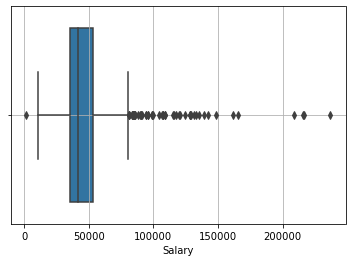

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


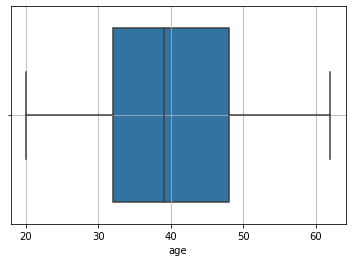

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


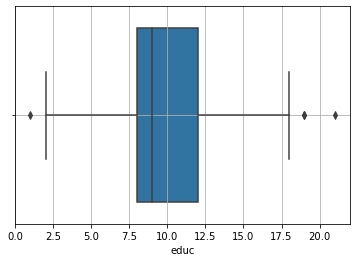

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


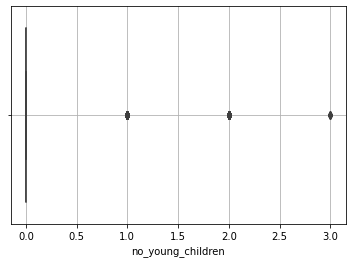

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


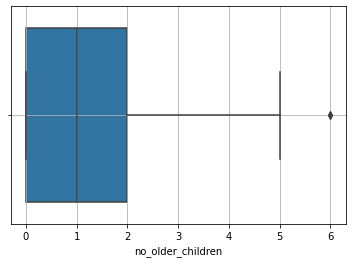

In [341]:
columns = ['Salary','age','educ','no_young_children','no_older_children']
for i in columns:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.show();

Outlier treatment does not look necessary.

#### UNIVARIATE ANALYSIS :

In [342]:
df_numerical=['Salary','age','educ','no_young_children','no_older_children']

Description of Salary variable
Minimum Value:  1322
Maximum Value:  236961
Mean Value:  47729.172018348625
Standard Deviation Value:  23418.66853107387
skewness Value:  3.103215542323346
.................................................................................
Boxplot of Salary


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


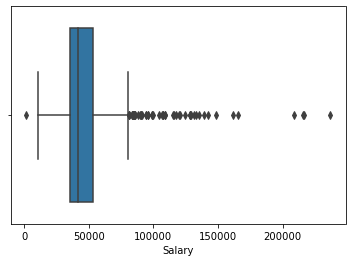

.................................................................................
Histogram of Salary


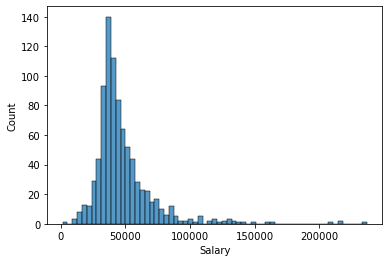

.................................................................................
Distplot of Salary


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


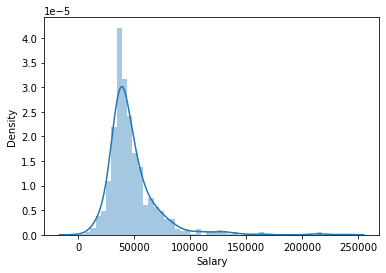

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of age variable
Minimum Value:  20
Maximum Value:  62
Mean Value:  39.955275229357795
Standard Deviation Value:  10.551674590487607
skewness Value:  0.1464120059496387
.................................................................................
Boxplot of age


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


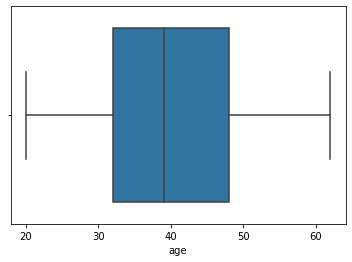

.................................................................................
Histogram of age


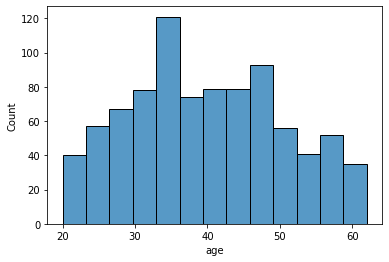

.................................................................................
Distplot of age


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


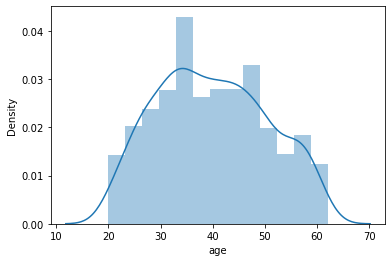

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of educ variable
Minimum Value:  1
Maximum Value:  21
Mean Value:  9.307339449541285
Standard Deviation Value:  3.0362586930870448
skewness Value:  -0.045501475549558336
.................................................................................
Boxplot of educ


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


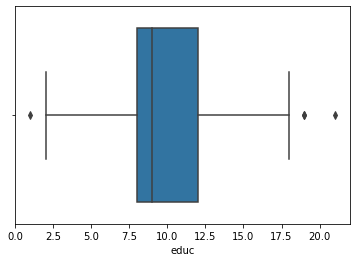

.................................................................................
Histogram of educ


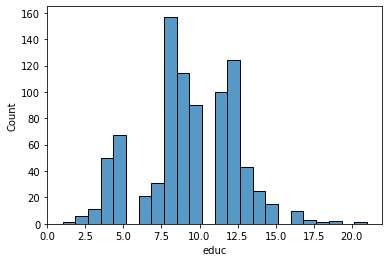

.................................................................................
Distplot of educ


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


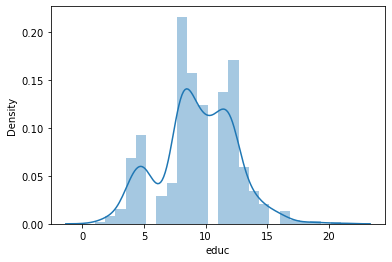

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of no_young_children variable
Minimum Value:  0
Maximum Value:  3
Mean Value:  0.3119266055045872
Standard Deviation Value:  0.6128699714906449
skewness Value:  1.946514578433618
.................................................................................
Boxplot of no_young_children


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


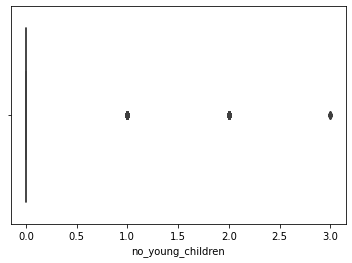

.................................................................................
Histogram of no_young_children


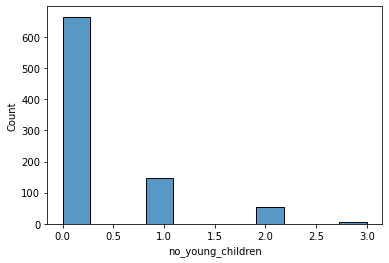

.................................................................................
Distplot of no_young_children


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


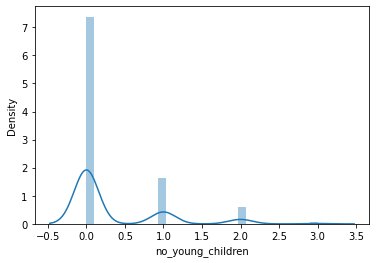

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of no_older_children variable
Minimum Value:  0
Maximum Value:  6
Mean Value:  0.9827981651376146
Standard Deviation Value:  1.086786292705566
skewness Value:  0.9539514741197574
.................................................................................
Boxplot of no_older_children


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


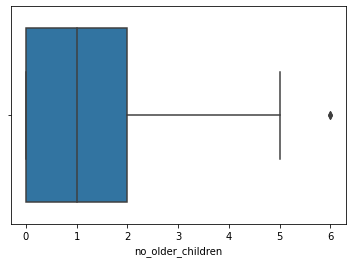

.................................................................................
Histogram of no_older_children


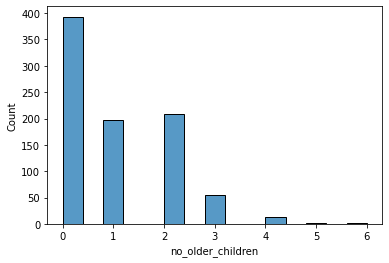

.................................................................................
Distplot of no_older_children


/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


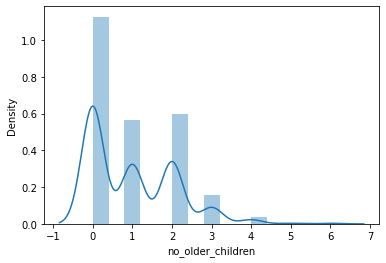

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [343]:
for i in df_numerical:
    print("Description of {} variable".format(i))
    print("Minimum Value: ",df[i].min())
    print("Maximum Value: ",df[i].max())
    print("Mean Value: ",df[i].mean())
    print("Standard Deviation Value: ",df[i].std())
    print("skewness Value: ",df[i].skew())
    print(".................................................................................")
    
    
    print("Boxplot of {}".format(i))
    sns.boxplot(df[i])
    plt.show()
    print(".................................................................................")
    
    
    print("Histogram of {}".format(i))
    sns.histplot(df[i])
    plt.show()
    print(".................................................................................")
    
    print("Distplot of {}".format(i))
    sns.distplot(df[i])
    plt.show()
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

In [422]:
df_categorical=['Holliday_Package','foreign_y']

Description of Holliday_Package variable
0    471
1    401
Name: Holliday_Package, dtype: int64


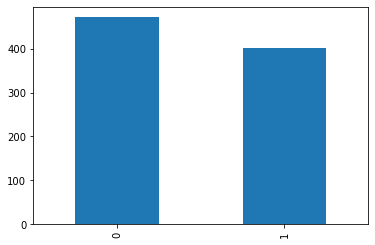

-----------------------------------------------------------------------------------------
Boxplot of Holliday_Package


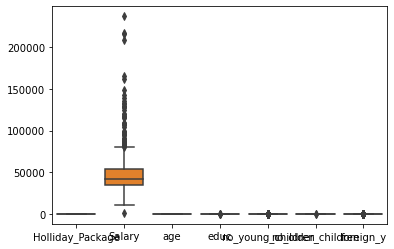

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of foreign_y variable
0    656
1    216
Name: foreign_y, dtype: int64


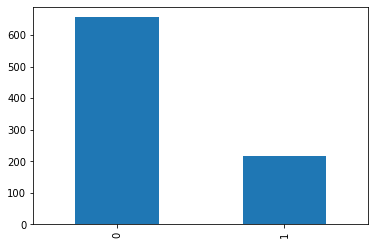

-----------------------------------------------------------------------------------------
Boxplot of foreign_y


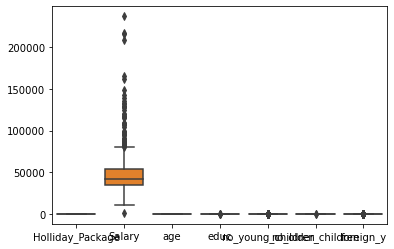

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [423]:
for i in df_categorical: 
    print("Description of {} variable".format(i))
    print(df[i].value_counts())
    df[i].value_counts().plot(kind = "bar")
    plt.show()
    print("-----------------------------------------------------------------------------------------")
    
    print("Boxplot of {}".format(i))
    sns.boxplot(data = df)
    plt.show()
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
    

/Users/damini/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


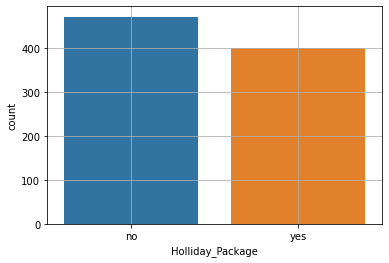

In [345]:
sns.countplot(df.Holliday_Package)
plt.grid()
plt.show()

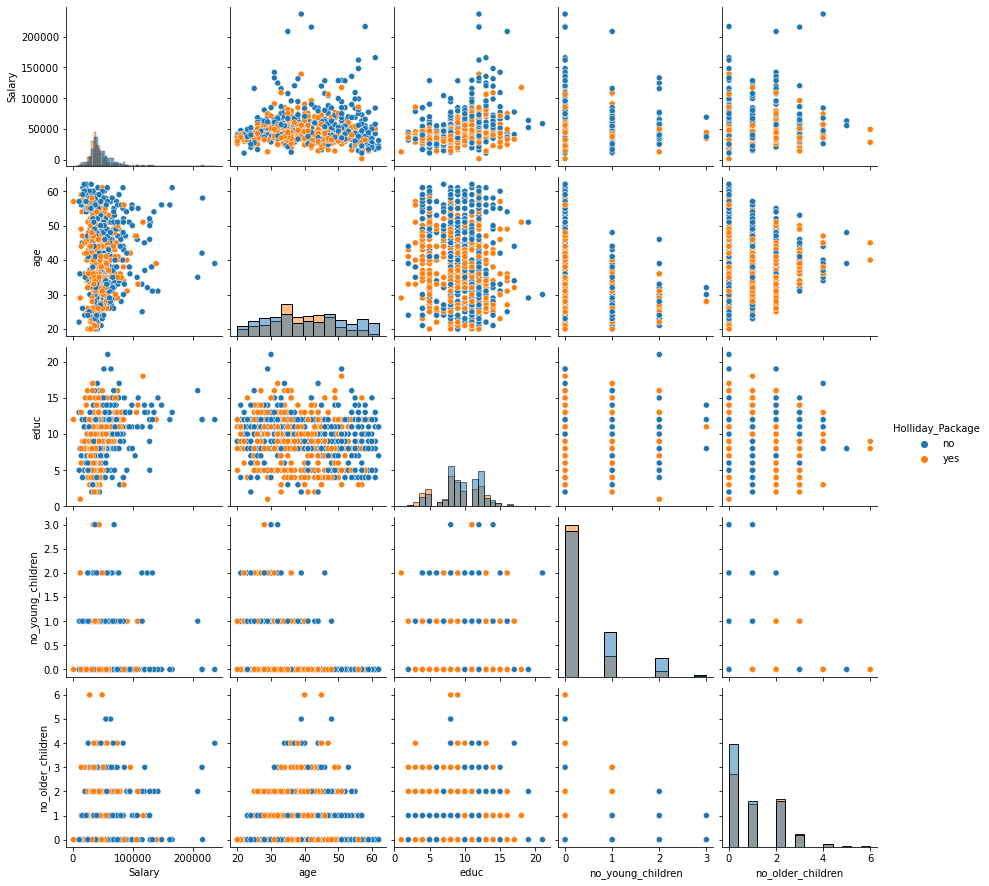

In [204]:
sns.pairplot(df ,diag_kind='hist' ,hue='Holliday_Package');

In [346]:
df.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


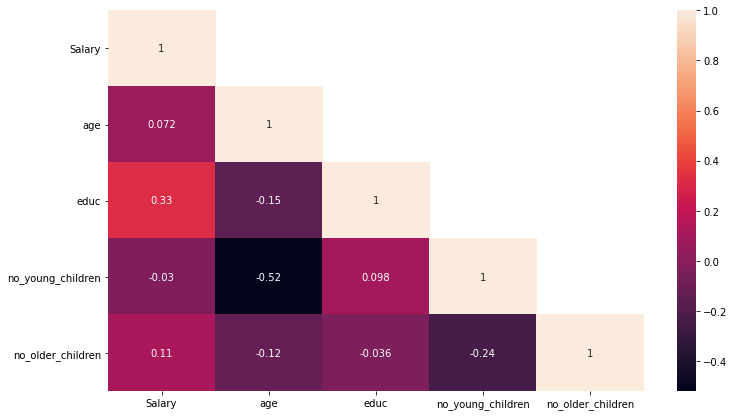

In [347]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));

### OBSERVATIONS:

* Total 7 columns are used to build the model.
* The number of rows in the dataframe is 872 and the number of columns in the dataframe is 8 .
* All the columns are in float datatype except Holliday_Package and foreign with data type as object.
* There are no missing values.
* There are no duplicates.
* Outlier Treatment is not necessary.

#### UNIVARIATE ANALYSIS :

* Salary variable shows the normal distribution.
* Age is slightly right skewed.
* Education, No young children and No older children show right skewness.
* For Holliday_Packag and foreign "no" shows more values than "yes".

#### MULTIVARIATE ANALYSIS :
 
* Highest correlation can be seen between education and salary with the value of 0.33 which in itself is less.

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [384]:
df['foreign']=np.where(df['foreign'] =='no', 'n',df['foreign'])
df['foreign']=np.where(df['foreign'] =='yes', 'y',df['foreign'])

In [385]:
## Converting the 'Holliday_Package' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [386]:
## Applying the created Label Encoder object for the target class
## Assigning the 0 to no and 1 to yes

df['Holliday_Package'] = LE.fit_transform(df['Holliday_Package'])
df.head(10)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,n
1,1,37207,45,8,0,1,n
2,0,58022,46,9,0,0,n
3,0,66503,31,11,2,0,n
4,0,66734,44,12,0,2,n
5,1,61590,42,12,0,1,n
6,0,94344,51,8,0,0,n
7,1,35987,32,8,0,2,n
8,0,41140,39,12,0,0,n
9,0,35826,43,11,0,2,n


In [387]:
## Converting the other 'object' type variables as dummy variables

df = pd.get_dummies(df,drop_first=True)
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_y
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int64
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign_y          872 non-null    uint8
dtypes: int64(6), uint8(1)
memory usage: 41.9 KB


#### Logistic Regression

In [394]:
# Copy all the predictor variables into X dataframe
X = df.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df['Holliday_Package']

In [395]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df['Holliday_Package'])

In [396]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


In [391]:
y_train.value_counts(1)

no     0.539344
yes    0.460656
Name: Holliday_Package, dtype: float64

In [392]:
y_test.value_counts(1)

no     0.541985
yes    0.458015
Name: Holliday_Package, dtype: float64

In [397]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

#### Linear Discriminant Analysis

In [282]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [279]:
X = df.drop('Holliday_Package',axis=1)
Y = df.pop('Holliday_Package')

In [283]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [295]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


In [284]:
#Fit the LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Logistic Regression

#### Predicting on Training and Test dataset

In [274]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

#### Getting the Predicted Classes and Probs

In [398]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685333,0.314667
1,0.539554,0.460446
2,0.697025,0.302975
3,0.496433,0.503567
4,0.557712,0.442288


#### Model Evaluation

In [399]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6672131147540984

#### AUC and ROC for the training data

In [401]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

AUC: 0.735


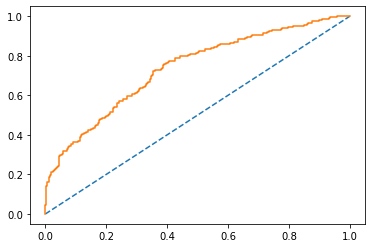

In [402]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [403]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6526717557251909

#### AUC and ROC for the test data

AUC: 0.735


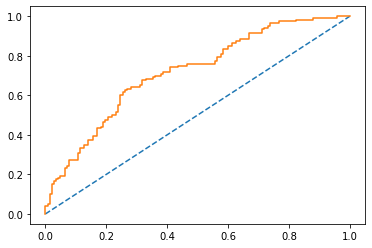

In [404]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion Matrix for the training data

In [405]:
confusion_matrix(y_train, ytrain_predict)

array([[243,  86],
       [118, 163]])

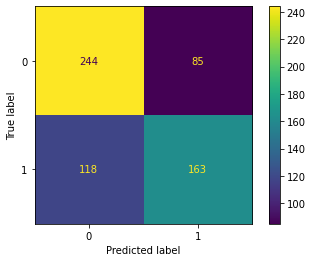

In [406]:
plot_confusion_matrix(model,X_train,y_train);

In [407]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.67      0.66       610



#### Confusion Matrix for test data

In [408]:
confusion_matrix(y_test, ytest_predict)

array([[110,  32],
       [ 55,  65]])

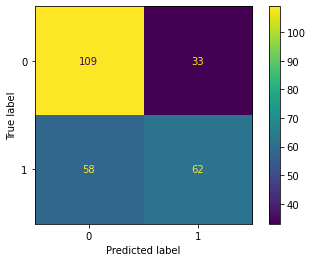

In [409]:
plot_confusion_matrix(model,X_test,y_test);

In [410]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       142
           1       0.67      0.54      0.60       120

    accuracy                           0.67       262
   macro avg       0.67      0.66      0.66       262
weighted avg       0.67      0.67      0.66       262



### Linear Discriminant Analysis :

#### Prediction

In [411]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

#### Training Data and Test Data Confusion Matrix Comparison

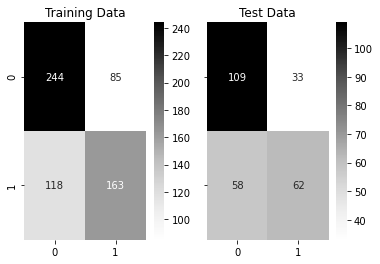

In [412]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');



### Training Data and Test Data Classification Report Comparison

In [414]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



### Probability prediction for the training and test data

In [ ]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [417]:
pred_prob_train[:,1]

array([0.73720713, 0.2626669 , 0.38436592, 0.76281077, 0.45159266,
       0.4286589 , 0.38823271, 0.30227204, 0.61744206, 0.64264447,
       0.25438554, 0.27325662, 0.38574554, 0.03986898, 0.20734952,
       0.35648368, 0.55144812, 0.33282369, 0.61915685, 0.64582764,
       0.62851735, 0.27656341, 0.87576481, 0.34247729, 0.0872146 ,
       0.82817061, 0.18437503, 0.73643601, 0.53705046, 0.17584703,
       0.32221426, 0.32333671, 0.38525479, 0.41356077, 0.3042488 ,
       0.30656927, 0.10379147, 0.4862905 , 0.4697555 , 0.22005293,
       0.24845762, 0.80021764, 0.51371657, 0.73644406, 0.79224877,
       0.39430253, 0.31045893, 0.9309568 , 0.43423953, 0.71424103,
       0.73777389, 0.46853883, 0.78498668, 0.38267539, 0.21918543,
       0.74768556, 0.26903046, 0.52836509, 0.67516804, 0.36620352,
       0.6186021 , 0.56436089, 0.54162682, 0.43959095, 0.57530545,
       0.61215993, 0.11465489, 0.57310932, 0.38672139, 0.2822507 ,
       0.35728131, 0.74850135, 0.77847187, 0.23545144, 0.40347

AUC for the Training Data: 0.735
AUC for the Test Data: 0.717


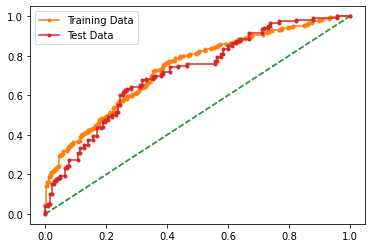

In [418]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

##### COMPARISON OF BOTH THE MODELS:

Logistic Regression –

For predicting Holliday_Package -no (Label 0 ) :

Precision (67%) – 67% of employees who have not opted for the holiday package are actually not opting for holiday package out of all employees predicted to have not opted.

Recall (77%) – Out of all the employees who have not opted for the holiday package), 77% of employees have been predicted correctly .

For predicting Holliday_Package -yes (Label 1 ) :

Precision (67%) – 67% of employees who have opted for the holiday package out of all employees predicted to take the package.

Recall (54%) – Out of all the employees actually have opted for the holiday package  , 54% of employees have been predicted correctly .

Overall accuracy of the model – 67 % of total predictions are correct

**INFERENCE -Accuracy, AUC, Precision and Recall for test data is almost inline with training data. This proves no overfitting or underfitting has happened, and overall the model is a good model for classification.

Linear Discriminant Analysis –

For predicting Holliday_Package -no (Label 0 ) :

Precision (65%) – 65% of employees who have not opted for the holiday package are actually not opting for holiday package out of all employees predicted to have not opted.

Recall (77%) – Out of all the employees who have not opted for the holiday package), 77% of employees have been predicted correctly .

For predicting Holliday_Package -yes (Label 1 ) :

Precision (65%) – 67% of employees who have opted for the holiday package out of all employees predicted to take the package.

Recall (52%) – Out of all the employees actually have opted for the holiday package  , 52% of employees have been predicted correctly .

Overall accuracy of the model – 65 % of total predictions are correct

**INFERENCE -Accuracy, AUC, Precision and Recall for test data is not properly inline with training data. This proves the overfitting of data has happened, and overall the model is a  not very good model for classification.

Logistic Regression model is better than LDA model for this data 


### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

#### SOLUTION :

On the basis of predictions, there are these following insights and recommendations ;

INSIGHTS :

•	Employees with more education are having more salary and the prefer less holiday packages (Extremes).
•	Employees with age 35-45 years prefer more holiday packages.                                           
•	Employees from age 20-50 years and no young children take more holiday packages.    
•	Employees with no young children and salary around 80-90k prefer more holiday packages.
•	Employees from age 30-50 and no older children prefer more holiday packages

RECOMMENDATIONS : 

•	The company should focus more employees with nominal or salary below 1 lakh rupees to opt for holiday packages.
•	The company should focus on hiring employees with nominal education level rather than high education level as they tend to opt more for holiday packages.
•	The company should focus on hiring middle age people with no young children as the opt for holiday packages frequently.
•	The company should include more domestic or national packages than foreign or international packages as they have more demand.
•	The company can separate the quality of packages for different class of employees that can be more relatable to there level of work and standard.
•	There is around 33% of the employees who have not opted for the package but can do , so they shall be focused.
